In [18]:
import multiSyncPy as msp
from sktime.utils.plotting import plot_correlations
from multiSyncPy import synchrony_metrics as sm
from scipy.signal import hilbert
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ants import get_datafiles_info, preprocess_antcolony_data, get_multisync_metrics

ant_colonies = get_datafiles_info(prepath='')

# take a single "trial" (one group of ants moving through time and space) as an example
example_data = ant_colonies['file'][0]
ants = preprocess_antcolony_data(example_data)

# this one has the ant_id as the index
ant_dict = {ant_id: ants[ants['ant_id'] == ant_id] for ant_id in ants['ant_id'].unique()}

print(f"Number of unique ants: {ants['ant_id'].nunique()}")

Number of unique ants: 10


c:\Users\Daniël\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Daniël\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


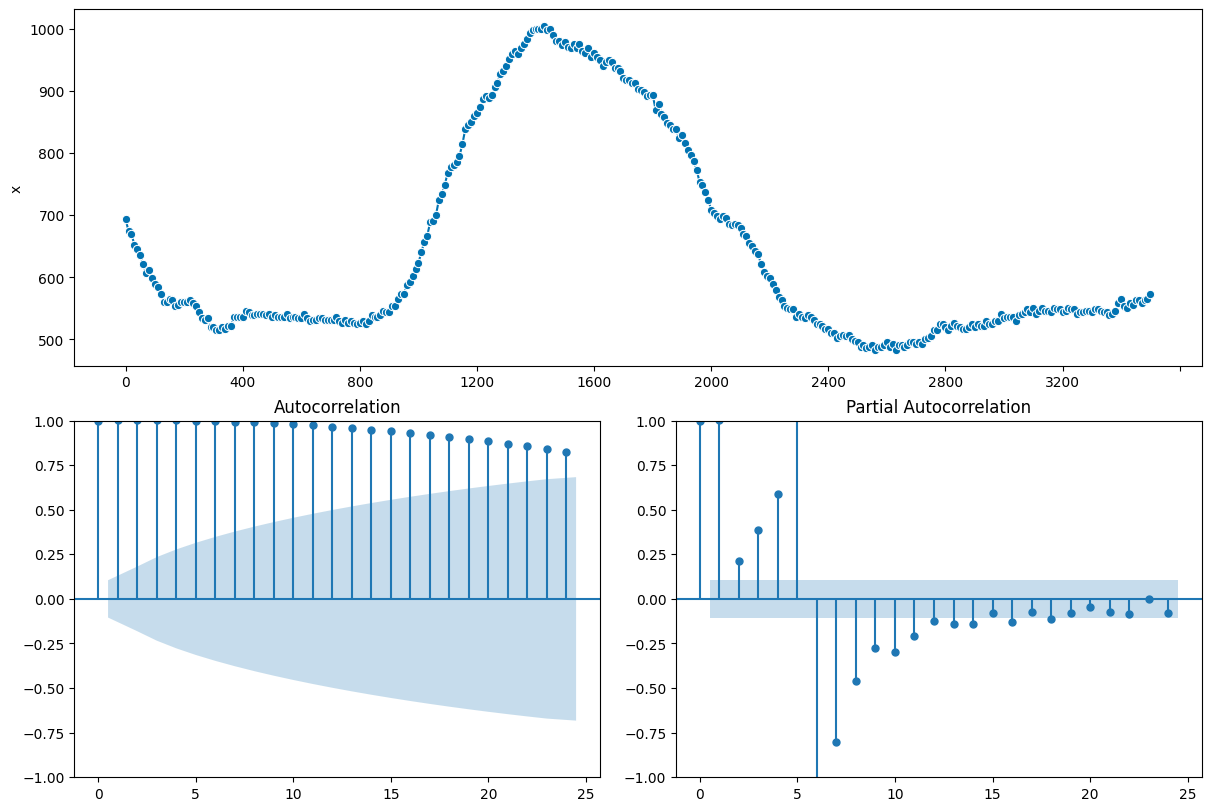

In [19]:
# # a starting approach can be to investigate one single ant only:
ant_11 = ant_dict[11]
plot_correlations(ant_11['x'])
plt.show()

Coherence: 0.14483338190959055
Symbolic entropy: 4.127137193429166
Rho: 0.9801752887280589


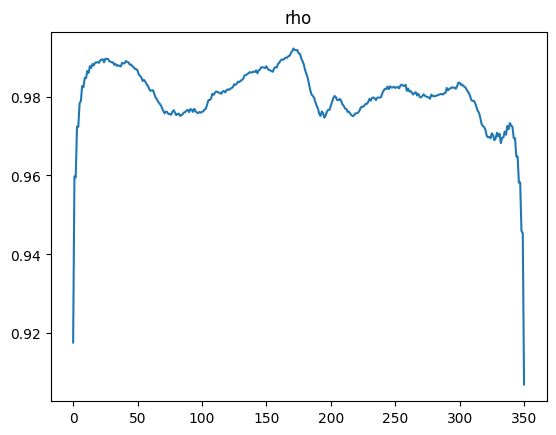

In [20]:
# try "multivariate synchrony" approaches
ant_team_data = np.array([ant_data['x'].values for ant_data in ant_dict.values()])
data_phases = np.angle(hilbert(ant_team_data))

print(f"Coherence: {sm.coherence_team(ant_team_data)}")
print(f"Symbolic entropy: {sm.symbolic_entropy(ant_team_data)}")
print(f"Rho: {sm.rho(data_phases)[1]}")

plt.plot(sm.rho(data_phases)[0])
plt.title('rho')
plt.show()

In [23]:
from scipy import stats
from IPython.display import display

metrics = [get_multisync_metrics(preprocess_antcolony_data(colony), target_var='x', n_observations_per_ant=100) for colony in ant_colonies['file'].tolist()]
coherence, symbolic_entropy, rho = zip(*metrics)

ant_colonies['coherence'] = coherence
ant_colonies['symbolic_entropy'] = symbolic_entropy
ant_colonies['rho'] = rho

display(ant_colonies.head(10))

indoor = ant_colonies[ant_colonies['recording_location'] == 'indoor']
outdoor = ant_colonies[ant_colonies['recording_location'] == 'outdoor']

# by adding the coherence measurements for each ant group, we can compare indoor and outdoor ants
display(stats.ttest_ind(indoor['coherence'], outdoor['coherence']))
display(stats.ttest_ind(indoor['symbolic_entropy'], outdoor['symbolic_entropy']))
display(stats.ttest_ind(indoor['rho'], outdoor['rho']))

display(stats.mannwhitneyu(indoor['coherence'], outdoor['coherence']))
display(stats.mannwhitneyu(indoor['symbolic_entropy'], outdoor['symbolic_entropy']))
display(stats.mannwhitneyu(indoor['rho'], outdoor['rho']))

,recording_location,file,coherence,symbolic_entropy,rho
0,indoor,Ant_dataset_noimg/IndoorDataset/Seq0001Object1...,0.166548,3.614594,0.993421
1,indoor,Ant_dataset_noimg/IndoorDataset/Seq0002Object1...,0.182019,4.041930,0.996240
2,indoor,Ant_dataset_noimg/IndoorDataset/Seq0003Object1...,0.180239,4.358343,0.992953
3,indoor,Ant_dataset_noimg/IndoorDataset/Seq0004Object1...,0.173449,4.270625,0.996883
4,indoor,Ant_dataset_noimg/IndoorDataset/Seq0005Object1...,0.193218,4.419719,0.999480
5,outdoor,Ant_dataset_noimg/OutdoorDataset/Seq0006Object...,0.174629,4.563581,0.945801
6,outdoor,Ant_dataset_noimg/OutdoorDataset/Seq0007Object...,0.173496,4.605170,0.985620
7,outdoor,Ant_dataset_noimg/OutdoorDataset/Seq0008Object...,0.169954,4.530623,0.957288
8,outdoor,Ant_dataset_noimg/OutdoorDataset/Seq0009Object...,0.177439,4.605170,0.956648
9,outdoor,Ant_dataset_noimg/OutdoorDataset/Seq0010Object...,0.213477,4.245605,0.896432


TtestResult(statistic=-0.2949324233202467, pvalue=0.7755544511483381, df=8.0)

TtestResult(statistic=-2.2884548582178206, pvalue=0.05138864556998804, df=8.0)

TtestResult(statistic=3.2471508048339484, pvalue=0.01175109960807532, df=8.0)

MannwhitneyuResult(statistic=13.0, pvalue=1.0)

MannwhitneyuResult(statistic=3.0, pvalue=0.059327060946523506)

MannwhitneyuResult(statistic=25.0, pvalue=0.007936507936507936)